In [3]:
%load_ext autoreload
%autoreload 2
import gc
import re
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
HOME = os.path.expanduser("~")
sys.path.append(f'{HOME}/kaggle/data_analysis/library')
import utils
from utils import get_categorical_features, get_numeric_features
import datetime

from tqdm import tqdm
import time
import sys

os.listdir('../input/')
key = 'card_id'
target = 'target'
ignore_list = [key, target, 'merchant_id', 'first_avtive_month']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import glob

win_path = '../features/4_winner/*.gz'
#========================================================================
# Data Load
base_path = glob.glob('../features/0_base/*.gz')
base = utils.read_df_pkl('../input/base*')
win_path_list = glob.glob(win_path) + glob.glob('base_path')
tmp_path_list = glob.glob('../features/5_tmp/*.gz')
win_path_list += tmp_path_list

base = utils.read_df_pkl('../input/base*')

base_train = base[~base[target].isnull()].reset_index(drop=True)
base_test = base[base[target].isnull()].reset_index(drop=True)
feature_list = utils.parallel_load_data(path_list=win_path_list)
df_feat = pd.concat(feature_list, axis=1)
train = pd.concat([base_train, df_feat.iloc[:len(base_train), :]], axis=1)
test = pd.concat([base_test, df_feat.iloc[len(base_train):, :].reset_index(drop=True)], axis=1)

#========================================================================
# card_id list by first active month
train_latest_id_list = np.load('../input/card_id_train_first_active_201712.npy')
test_latest_id_list = np.load('../input/card_id_test_first_active_201712.npy')
train = train.loc[train[key].isin(train_latest_id_list), :].reset_index(drop=True)
test = test.loc[test[key].isin(test_latest_id_list), :].reset_index(drop=True)
submit = []
#========================================================================
df_lag = pd.concat([train, test], axis=0)


win_path = '../model/old_201712/*.gz'
#========================================================================
# Data Load
base_path = glob.glob('../features/0_base/*.gz')
base = utils.read_df_pkl('../input/base*')
win_path_list = glob.glob(win_path) + glob.glob('base_path')

base = utils.read_df_pkl('../input/base*')

base_train = base[~base[target].isnull()].reset_index(drop=True)
base_test = base[base[target].isnull()].reset_index(drop=True)
feature_list = utils.parallel_load_data(path_list=win_path_list)
df_feat = pd.concat(feature_list, axis=1)
train = pd.concat([base_train, df_feat.iloc[:len(base_train), :]], axis=1)
test = pd.concat([base_test, df_feat.iloc[len(base_train):, :].reset_index(drop=True)], axis=1)

#========================================================================
# card_id list by first active month
train_latest_id_list = np.load('../input/card_id_train_first_active_201712.npy')
test_latest_id_list = np.load('../input/card_id_test_first_active_201712.npy')
train = train.loc[train[key].isin(train_latest_id_list), :].reset_index(drop=True)
test = test.loc[test[key].isin(test_latest_id_list), :].reset_index(drop=True)
submit = []
#========================================================================

df_old = pd.concat([train, test], axis=0)

print(df_lag.shape)
print(df_old.shape)
display(df_lag.head())
display(df_old.head())

100%|██████████| 3/3 [00:00<00:00, 83.33it/s]


(16403, 181)
(16403, 79)


,card_id,target,173_l02_org_lag0_2_auth1_monthly_avg_installments_min@,176_l02_auth1_first5_date_diff_lag1_lag1_std@,173_l02_org_lag0_2_auth1_installments_sum@,174_l02_org_lag0_2_auth1_cat1_monthly_avg_month_diff_std@,176_l02_auth1_first10_date_diff_lag1_lag1_mean@,175_l02_auth1_first10_date_diff_mean@,175_l02_auth1_last20_date_diff_std@,173_l02_org_lag0_2_auth1_month_diff_std@,173_l02_org_lag0_2_auth1_amount_per_installments_sum@,174_l02_org_lag0_2_auth1_cat0_freq_per_this_term@,173_l02_org_lag0_2_auth1_monthly_avg_month_diff_std@,175_l02_auth1_last5_date_diff_std@,174_l02_org_lag0_2_auth1_cat1_category_3_C_mean@,174_l02_org_lag0_2_auth0_cat0_purchase_amount_min@,174_l02_org_lag0_2_auth1_cat0_installments_std@,178_l02_org_month_lag_2_auth1_purchase_amount_sum@,175_l02_auth0_last5_date_diff_mean@,173_l02_org_lag0_2_auth1_month_diff_mean@,175_l02_auth1_last10_date_diff_std@,175_l02_auth1_last10_date_diff_mean@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_purchase_amount_max@,174_l02_org_lag0_2_auth1_cat0_purchase_amount_max@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_installments_std@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_purchase_amount_mean@,173_l02_org_lag0_2_auth1_amount_per_installments_mean@,175_l02_main_city_ratio@,173_l02_org_lag0_2_auth0_amount_per_this_term@,177_l02_auth1_null_cnt@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_purchase_amount_sum@,175_l02_auth1_last15_date_diff_std@,175_l02_auth1_last20_date_diff_mean@,173_l02_org_lag0_2_auth1_amount_per_this_term@,178_l02_org_month_lag_2_auth0_purchase_amount_sum@,176_l02_auth1_last10_date_diff_lag1_lag1_mean@,173_l02_org_lag0_2_auth1_purchase_amount_min@,180_l34_auth1_new_lag3_4_month_diff_std@,178_l02_org_month_lag_1_auth1_purchase_amount_sum@,174_l02_org_lag0_2_auth1_cat1_monthly_avg_purchase_amount_max@,173_l02_org_lag0_2_auth1_monthly_avg_purchase_amount_sum@,174_l02_org_lag0_2_auth1_0_cat1_term@,178_l02_org_month_lag_2_auth1_purchase_amount_mean@,173_l02_org_lag0_2_auth1_monthly_avg_purchase_amount_mean@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_installments_mean@,174_l02_org_lag0_2_auth1_cat1_term_from_first_month@,173_l02_org_lag0_2_auth1_month_lag_mean@,175_l02_auth1_first15_date_diff_std@,174_l02_org_lag0_2_auth1_cat1_first_buy@,175_l02_auth1_first5_date_diff_mean@,173_l02_org_lag0_2_auth1_this_term@,178_l02_org_month_lag_1_auth1_installments_mean@,174_l02_org_lag0_2_auth1_cat0_purchase_amount_mean@,174_l02_org_lag0_2_auth1_cat0_month_diff_mean@,180_l34_auth1_new_lag3_4_purchase_amount_min@,177_l02_all_null_cnt@,174_l02_org_lag0_2_auth1_0_cat0_term@,174_l02_org_lag0_2_auth1_cat0_category_2_5_0_mean@,173_l02_org_lag0_2_auth1_monthly_avg_category_2_1_0_mean@,173_l02_org_lag0_2_auth1_purchase_amount_mean@,173_l02_org_lag0_2_auth1_purchase_amount_max@,174_l02_org_lag0_2_auth1_cat0_monthly_avg_category_3_C_mean@,174_l02_org_lag0_2_auth1_cat1_month_diff_mean@,175_l02_auth0_first10_date_diff_mean@,173_l02_org_lag0_2_auth1_monthly_avg_category_3_B_mean@,176_l02_auth1_first15_date_diff_lag1_lag1_std@,174_l02_org_lag0_2_auth0_cat1_term_from_first_month@,173_l02_org_lag0_2_auth1_monthly_avg_category_1_mean@,178_l02_org_month_lag_0_auth1_purchase_amount_mean@,175_l02_auth1_last15_date_diff_mean@,173_l02_org_lag0_2_auth0_term_from_first_month@,173_l02_org_lag0_2_auth0_amount_per_installments_sum@,176_l02_auth0_first10_date_diff_lag1_lag1_mean@,174_l02_org_lag0_2_auth1_cat0_term_from_first_month@,174_l02_org_lag0_2_auth1_cat0_first_buy@,173_l02_org_lag0_2_auth1_monthly_avg_purchase_amount_min@,173_l02_org_lag0_2_auth1_0_term@,174_l02_org_lag0_2_auth1_cat0_instthisments_per_this_term@,174_l02_org_lag0_2_auth1_cat0_category_3_C_mean@,173_l02_org_lag0_2_auth1_term_from_first_month@,174_l02_org_lag0_2_auth0_cat0_first_buy@,178_l02_org_month_lag_0_auth1_purchase_amount_sum@,174_l02_org_lag0_2_auth1_cat1_amount_per_installments_mean@,173_l02_org_lag0_2_auth0_first_buy@,174_l02_org_lag0_2_auth1_cat0_month_lag_mean@,173_l02_org_lag0_2_auth1_category_1_mean@,174_l02_org_lag0_2_auth1_

,card_id,target,132_ddf_hist_first10_diff_days_lag1@_std@,111_ker_new_purchase_date_uptonow@,111_ker_hist_merchant_id_nunique@,111_ker_feature_1@,111_ker_new_merchant_id_nunique@,157_trm_new_freq_per_days_personal_term@,111_ker_new_category_1_sum@,114_mer_merchant_id_M_ID_deb43ff012@,111_ker_new_month_nunique@,114_mer_merchant_id_M_ID_2c4b8c61f6@,114_mer_merchant_id_M_ID_82a30d9203@,114_mer_merchant_id_M_ID_a9430074ad@,111_ker_hist_purchase_date_diff@,111_ker_new_month_lag_mean@,165_fe3_lag0_-2_auth0_cat0_month_lag_mean@,111_ker_hist_month_nunique@,114_mer_merchant_id_M_ID_9e84cda3b1@,168_fe3_lag0_-2_auth1_dummie_category_2_4_0_sum@,111_ker_new_category_2_mean_mean@,111_ker_new_month_diff_mean@,152_ah0_auth0_hist_installments_std@,118_ah0_auth0_hist_category_1_sum@,114_mer_merchant_id_M_ID_57df19bf28@,111_ker_new_purchase_date_max@,165_fe3_lag0_-2_auth1_cat0_term_from_now@,114_mer_merchant_id_M_ID_ee75252e6a@,166_fe3_new_cat1_amount_per_90days@,114_mer_merchant_id_M_ID_b7459adc65@,110_ker_new_category_3_B_mean,165_fe3_lag0_-2_auth1_cat0_elapsed_time_from_first@,111_ker_hist_purchase_date_average@,111_ker_new_purchase_date_diff@,111_ker_hist_installments_min@,152_ah1_auth1_hist_purchase_amount_sum@,111_ker_feature_3@,115_out_state_id_24@,111_ker_card_id_total@,111_ker_new_merchant_category_id_nunique@,114_mer_merchant_id_M_ID_8fadd601d2@,115_out_state_id_9@,115_out_state_id_-1@,117_ah1_auth1_hist_category_1_sum@,117_ah1_auth1_hist_category_3_mean_mean@,111_ker_new_hour_nunique@,115_out_state_id_2@,114_mer_merchant_id_M_ID_ca4d18b336@,117_ah1_auth1_hist_purchase_amount_mean@,165_fe3_lag0_-2_auth1_cat1_card_id_size@,111_ker_new_installments_mean@,114_mer_merchant_id_M_ID_4e461f7e14@,115_out_state_id_21@,117_ah1_auth1_hist_month_diff_mean@,171_fe3_auth1_new_lag1_2_installments_std@,165_fe3_lag0_-2_auth1_cat0_term@,165_fe3_lag0_-2_auth1_cat0_installments_min@,111_ker_hist_installments_max@,118_ah0_auth0_hist_card_id_size@,111_ker_new_category_1_mean@,145_cat_auth0_category_1_N_diff_days_std@,111_ker_new_purchase_amount_mean@,165_fe3_lag0_-2_auth1_cat0_merchant_id_nunique@,115_out_state_id_22@,168_fe3_lag0_-2_auth0_month_lag_mean@,115_out_state_id_12@,145_cat_new_category_2_4_0_record_sum@,111_ker_new_purchase_amount_max@,165_fe3_lag0_-2_auth1_cat0_month_lag_mean@,111_ker_hist_subsector_id_nunique@,165_fe3_lag0_-2_auth0_cat1_purchase_amount_min@,114_mer_merchant_id_M_ID_00a6ca8a8a@,111_ker_new_month_lag_max@,165_fe3_lag0_-2_auth0_cat1_installments_sum@,111_ker_hist_merchant_category_id_nunique@,118_ah0_auth0_hist_purchase_amount_sum@,166_fe3_new_cat0_amount_per_90days@,114_mer_merchant_id_M_ID_cc72dac895@,111_ker_new_subsector_id_nunique@
0,C_ID_09da8a2858,-0.833506,0.000000,266.0,39,5,14.0,0.095238,0.0,0.0,2.0,0.0,0.0,0.0,79,1.571429,-1.000000,3,0.0,0.0,-0.550293,10.785714,0.408248,0.0,0.0,1.524828e+09,61.0,0.0,-1.000000,0.0,0.428571,89.0,1.253968,49.0,-1,20.009058,1,0.0,77.0,13.0,0.0,0.116883,0.025974,2,-0.470959,10.0,0.0,0.0,-0.395772,2.0,2.908203,0.0,0.0,10.017544,1.099609,6838399.0,0.0,10,6.0,0.000000,0.408248,-0.226196,36.0,0.000000,-1.000000,0.0,NaN,1.732422,-1.145455,16,-1.0,1.0,2.0,-2.0,29,-4.063710,0.075684,0.0,8.0
1,C_ID_4e2e2c0822,-0.045369,3.122499,269.0,12,2,8.0,0.055556,0.0,NaN,2.0,NaN,NaN,NaN,58,1.625000,-1.000000,3,NaN,0.0,-0.569336,10.375000,NaN,0.0,NaN,1.524578e+09,62.0,NaN,-1.000000,NaN,0.000000,88.0,2.416667,31.0,0,4.595662,0,0.0,32.0,8.0,NaN,0.000000,0.000000,0,-0.641168,7.0,0.0,NaN,-0.546996,-1.0,0.000000,NaN,0.0,10.260870,0.000000,5014129.0,0.0,0,1.0,0.000000,NaN,-0.508301,12.0,0.000000,-1.000000,0.0,NaN,0.199707,-0.434783,7,-1.0,NaN,2.0,-2.0,10,-0.622789,0.021210,NaN,7.0
2,C_ID_eb47fbd9a5,-1.468858,8.115828,274.0,9,2,14.0,0.100719,0.0,0.0,2.0,0.0,0.0,0.0,58,1.428571,-17.000000,3,0.0,0.0,-0.569336,10.571429,NaN,NaN,0.0,1.524121e+09,73.0,0.0,-1.000000,0.0,1.000000,77.0,5.272727,34.0,1,0.746845,0,0.0,25.0,8.0,0.0,0.000000,0.000000,0,-0.556181,9.0,0.0,0.0,-0.678913,-1.0,1.000000,0.0,0.0,10.000000,1.000000,502660

In [15]:
lag_new_cols = [col for col in df_lag.columns if col.count('new') and col.count('amount') and col.count('mean') and col.count('auth1')]
old_new_cols = [col for col in df_old.columns if col.count('new') and col.count('amount') and col.count('mean')]
print(lag_new_cols)
print(old_new_cols)

['180_l34_auth1_new_lag3_4_amount_per_installments_mean@', '180_l34_auth1_new_lag3_4_purchase_amount_mean@']
['111_ker_new_purchase_amount_mean@']


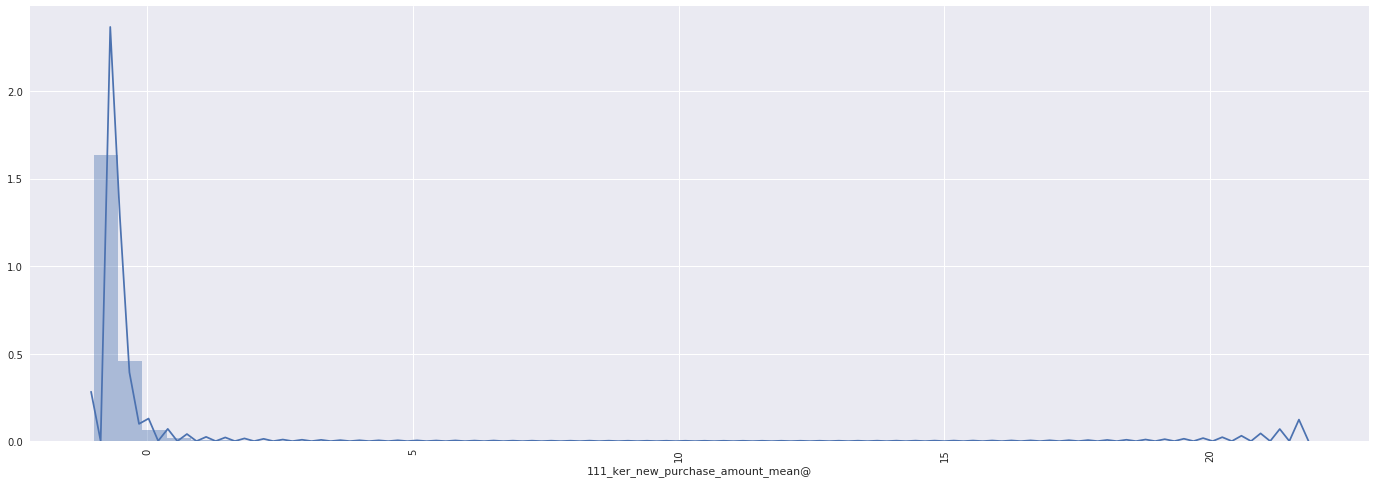

In [32]:
plt.figure(figsize=(24, 8))
# sns.distplot(a=df_lag[lag_new_cols[1]], hist=True, bins=50)
# plt.xticks(rotation=90)
sns.distplot(a=df_old[old_new_cols[0]].fillna(-1), hist=True, bins=50)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df_train.ko
plt.figure(figsize=(24, 8))
sns.lmplot(data=df, x='first_active_month', order=first_months)
plt.xticks(rotation=90)
sys.exit()
